In [16]:
import pandas as pd


trace = pd.read_csv("acol_trace.txt", sep="\t")

which_variable = "species_log_nu"
which_number = which_variable + "_100"

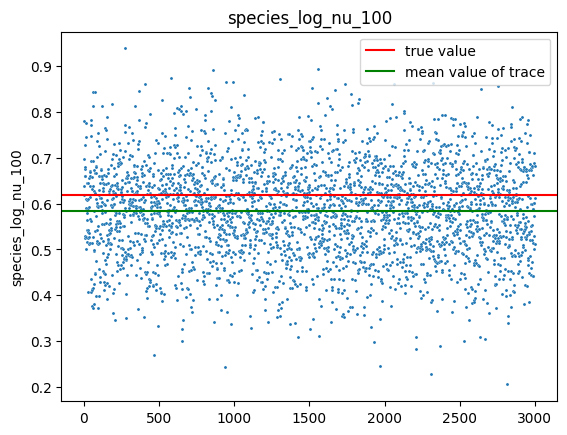

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=trace, y=which_number, x=range(len(trace)), s=5).set_title(
    which_number
)
plt.axhline(y=trace[which_number][0], color="red", label="true value")
plt.axhline(y=trace[which_number].mean(), color="green", label="mean value of trace")
plt.legend()

In [18]:
species_alpha = [i for i in trace.columns if which_variable in i]

In [19]:
trace[species_alpha]

,species_log_nu_1,species_log_nu_2,species_log_nu_3,species_log_nu_4,species_log_nu_5,species_log_nu_6,species_log_nu_7,species_log_nu_8,species_log_nu_9,species_log_nu_10,...,species_log_nu_130,species_log_nu_131,species_log_nu_132,species_log_nu_133,species_log_nu_134,species_log_nu_135,species_log_nu_136,species_log_nu_137,species_log_nu_138,species_log_nu_139
0,0.631543,0.716845,0.567585,0.530720,0.487082,0.564048,0.537221,0.568252,0.503202,0.576535,...,0.637790,0.602685,0.533707,0.520712,0.553659,0.519602,0.689680,0.530159,0.632461,0.588416
1,0.612797,0.641482,0.567585,0.530720,0.487082,0.564048,0.523816,0.604574,0.449046,0.530574,...,0.657407,0.602685,0.533707,0.487410,0.553659,0.519602,0.624479,0.600637,0.831827,0.623517
2,0.447616,0.423943,0.577551,0.614253,0.422516,0.779629,0.739780,0.656192,0.596945,0.469629,...,0.548411,0.702541,0.512975,0.588318,0.630881,0.345464,0.585811,0.525400,0.805528,0.465758
3,0.605724,0.588642,0.445948,0.434680,0.592346,0.512711,0.621467,0.640940,0.455909,0.567976,...,0.426905,0.511368,0.596929,0.634489,0.701832,0.461184,0.669527,0.753956,0.466494,0.524569
4,0.584165,0.664623,0.562287,0.514825,0.247893,0.655589,0.484158,0.763275,0.553394,0.732663,...,0.714032,0.507204,0.579868,0.633053,0.494283,0.531038,0.714438,0.668120,0.554162,0.597652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.544321,0.477381,0.573764,0.470603,0.500494,0.528005,0.472839,0.536109,0.642564,0.603284,...,0.655324,0.727181,0.564646,0.488868,0.467960,0.676887,0.669486,0.607395,0.622740,0.782434
2997,0.611960,0.664876,0.509298,0.485069,0.473512,0.669771,0.790183,0.655090,0.521326,0.611691,...,0.586424,0.621474,0.650683,0.536742,0.523631,0.769722,0.613268,0.542871,0.538867,0.726052
2998,0.760067,0.683257,0.558545,0.620777,0.470415,0.675502,0.680382,0.449749,0.780383,0.405627,...,0.657894,0.586547,0.480602,0.691338,0.699016,0.597768,0.613268,0.694932,0.636868,0.649855
2999,0.579479,0.661260,0.663692,0.543732,0.609086,0.781171,0.729271,0.350181,0.529157,0.624786,...,0.431481,0.678467,0.629012,0.505474,0.739878,0.558988,0.723468,0.640705,0.552719,0.575292


(array([12., 11., 16., 16., 14., 11., 20., 13., 19.,  7.]),
 array([0.00266578, 0.10213262, 0.20159947, 0.30106631, 0.40053316,
        0.5       , 0.59946684, 0.69893369, 0.79840053, 0.89786738,
        0.99733422]),
 <BarContainer object of 10 artists>)

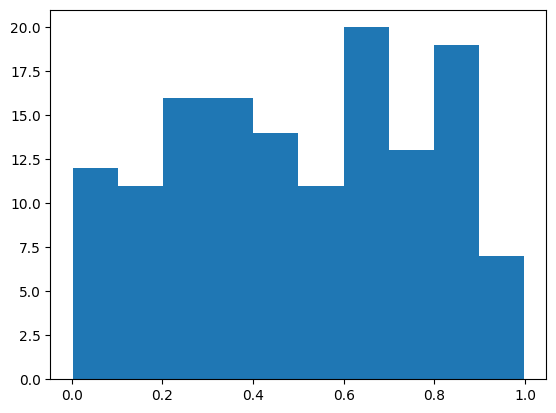

In [20]:
import matplotlib.pyplot as plt

alphas_smaller_than_true_alpha = (
    trace[species_alpha].iloc[1:] < trace[species_alpha].iloc[0]
).sum() / len(trace)

plt.hist(alphas_smaller_than_true_alpha)

In [21]:
Z_state = pd.read_csv("../acol_simulated_Z_species.txt", sep="\t")

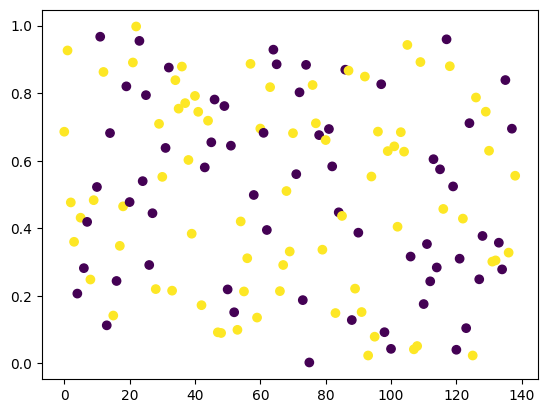

In [22]:
plt.scatter(
    x=range(len(alphas_smaller_than_true_alpha)),
    y=alphas_smaller_than_true_alpha,
    c=Z_state["Z_state"],
)